# XOR problem
---

It is one of the simplest problem which can be solved by using artificial neural network (ANN). It is a classification problem with outputs of XOr logic gates given two binary inputs. The perceptrons models was unable to solve this  problem because XOR outputs are not linearly separable, which the perceptrons are unable to solve. The solution was to layer the simple perceptron units in order to create a layered architecture, also called a multilayer perceptron (MLP).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [143]:
class Neural_Network:
    def __init__(self, n_h, n_x, n_y):
        self.W1 = np.random.randn(n_h, n_x)
        self.B1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_y, n_h)
        self.B2 = np.zeros((n_y, 1))
        print(f"Initial Weights are \n {self.W1} \n ==== \n {self.W2} \nBiases \n {self.B1} \n ==== \n {self.B2}")
        
        
    def run(self, X, Y, epochs, alpha):
        costs = []
        for epoch in range(epochs):
            cost, params = self.forward_propagate(X, Y)
            if (epoch+1) % 500 == 0:
                print(f"Epoch: {epoch+1} and Cost: {cost}")
            costs.append(cost)
            grads = self.back_prop(X, Y, params)
            self.update_parameters(grads, alpha)
        return costs
    
    def forward_propagate(self, X, Y):
        m = X.shape[1] # Number of examples
        Z1 = np.dot(self.W1, X) + self.B1
        A1 = sigmoid(Z1)
        
        Z2 = np.dot(self.W2, A1) + self.B2
        A2 = sigmoid(Z2)
        
        logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        cost = -np.sum(logprobs) / m
        params = {"A1": A1, "A2": A2, "Z1": Z1}
        return cost, params
    
    def back_prop(self, X, Y, params):
        m = X.shape[1]
        A1 = params["A1"]
        A2 = params["A2"]
        Z1 = params["Z1"]
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        dB2 = np.sum(dZ2, axis=1, keepdims=True) / m
        
        dZ1 = np.dot(self.W2.T, dZ2) * (A1 * (1 - A1))
        dW1 = np.dot(dZ1, X.T) / m
        dB1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "dW2": dW2, "dB1": dB1, "dB2": dB2}
        return grads
    
    def update_parameters(self, grads, alpha):
        dW1 = grads["dW1"]
        dW2 = grads["dW2"]
        dB1 = grads["dB1"]
        dB2 = grads["dB2"]
        
        self.W1 -= (alpha * dW1)
        self.W2 = self.W2 - (alpha * dW2)
        self.B1 = self.B1 - (alpha * dB1)
        self.B2 = self.B2 - (alpha * dB2)
#         print(f"--{alpha * dW2}")
        

Input Features: 2, Output Shape: 1, and Hidden Units: 2


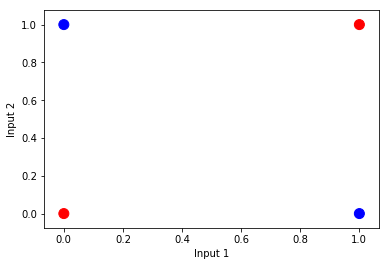

In [137]:
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1],
])
Y = np.array([
    [0, 1, 1, 0],
])
n_h = 2 # Number of hidden units
n_x = X.shape[0] # Number of input features
n_y = Y.shape[0] # Number of output
print(f"Input Features: {n_x}, Output Shape: {n_y}, and Hidden Units: {n_h}")
color = np.array(['r', 'b'])
plt.scatter(X[0], X[1], s=100, c=color[Y[0]])
plt.xlabel("Input 1")
plt.ylabel("Input 2");

Initial Weights are 
 [[-0.59731607 -0.23792173]
 [-1.42406091 -0.49331988]] 
 ==== 
 [[-0.54286148  0.41605005]] 
Biases 
 [[0.]
 [0.]] 
 ==== 
 [[0.]]
Epoch: 500 and Cost: 0.6926446622117439
Epoch: 1000 and Cost: 0.6898358237557992
Epoch: 1500 and Cost: 0.679780127595228
Epoch: 2000 and Cost: 0.6468413023433821
Epoch: 2500 and Cost: 0.5817549966227955
Epoch: 3000 and Cost: 0.5148322659338681
Epoch: 3500 and Cost: 0.4572430168126036
Epoch: 4000 and Cost: 0.3569798836981163
Epoch: 4500 and Cost: 0.2173342857765423
Epoch: 5000 and Cost: 0.13184848275942473
Epoch: 5500 and Cost: 0.08834031432849061
Epoch: 6000 and Cost: 0.06464627579066325
Epoch: 6500 and Cost: 0.050344922901950515
Epoch: 7000 and Cost: 0.04095461189560785
Epoch: 7500 and Cost: 0.03438274159059624
Epoch: 8000 and Cost: 0.029554765419392972
Epoch: 8500 and Cost: 0.025871919327404957
Epoch: 9000 and Cost: 0.022977505414983036
Epoch: 9500 and Cost: 0.020647140981705118
Epoch: 10000 and Cost: 0.01873321342868859


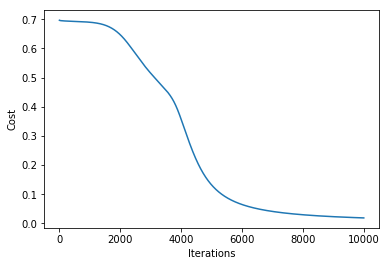

In [144]:
network = Neural_Network(n_h, n_x, n_y) # Create a network object
costs = network.run(X, Y, 10000, 0.1) # Run the network on the input.
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost");

In [159]:
# Evaluate the model and oberve the final outputs.
cost, params = network.forward_propagate(X, Y)
print("Final Weights")
print(f"{network.W1}\n{network.W2}")
print("Final Biases")
print(f"{network.B1}\n{network.B2}")
print(f"Final Cost is: {cost:.5}")
print(f"Final predicted probabilities: {params['A2']}")
print(f"Final predicted outputs: {params['A2'].round()}")

Final Weights
[[-6.49610278 -6.38878117]
 [-4.70317873 -4.68758718]]
[[-10.11561282   9.56324588]]
Final Cost is: 0.01873
Final predicted probabilities: [[0.01426074 0.98323077 0.98338752 0.0265337 ]]
Final predicted outputs: [[0. 1. 1. 0.]]


# Decision Boundary
Since the problem is not linearly separable, it would be interesting to see how the MLP separated the data.

## Note -
- The network weights were not updating because the learning rate was too low, which required huge number of iterations. Increasing the LR solved the problem.